## Problem1: Fashion Image Recognition using Deep CNN (50 points):


Write and submit your python codes in “Jupyter Notebook” to perform the following tasks.
Make sure to provide proper descriptions as MarkDown for each section of your code.


In this question, we try to improve the accuracy of the Fashion Image Recognition system that
we developed in the class in Lab5. Download and open the Lab5 ipython tutorial file (it is on CSNS
under Lectures). Add the following lines on the top of your code to fix random seed for
reproducibility:
import numpy as np
np.random.seed(0)


Now, Modify the CNN structure and parametersto increase the testing accuracy to At LEAST 92%
Accuracy on the TESTING Set.


I want you to be creative and use all knowledge you have gained from this class to improve the
results (don’t change the dataset, you can only change the CNN structure or learning
parameters). Here are some ideas that you may want to use:

I- It is obvious that there are infinite number ways to change the code to achieve this
accuracy. Thus, I expect to receive a Unique code from each student.

II- You need to do Trial & Error to achieve the desired accuracy. That is why I decided to use
the Fashion Dataset since it includes small grayscale images, and everyone can process
that on personal laptops. However, make sure to start early!

III- One student, who achieves the highest accuracy in the class, will get 10% bonus on the
overall grade of the class!

In [1]:

# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# CNN
from keras.layers import Convolution2D, MaxPooling2D,AveragePooling2D,Convolution3D

# import some utilities to transform our data
from keras.utils import np_utils



Using TensorFlow backend.


In [2]:
import numpy as np
np.random.seed(0)

In [3]:
# Keras will download MNIST dataset for us:
from keras.datasets import fashion_mnist
 
# By default, the first 60k of MNIST has been defined as training and the rest as testing set: 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
#print the size of dataset
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


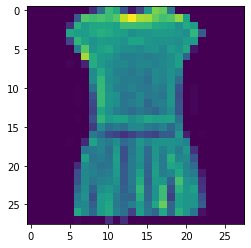

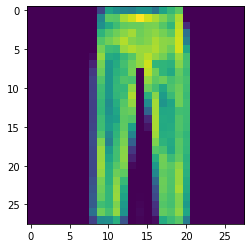

In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#display data image
imgplot = plt.imshow(X_train[3,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[16,:,:],cmap='viridis')
plt.show()


In [6]:
#
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
#print the size of dataset

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
# simply normalize the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
# output label:
print (y_train.shape)
print (y_train[:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [10]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [11]:
# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


1- Changing the structure or parameters of the CNN including all layers (Conv Layers, Pooling
layers, Dropout Layers, Fully Connected Layers, …).


In [39]:
# Declare Sequential model fro our network:
model = Sequential()

In [40]:
# CNN first layer (with 40 3x3 filter):
model.add(Convolution2D(40, (3, 3), activation='elu', input_shape=(28,28,1)))
print(model.output_shape) 

# If your image batch is of N images of HxW size with C channels: 
# theano uses the NCHW ordering while tensorflow uses the NHWC ordering.

(None, 26, 26, 32)


In [ ]:
odel.add(Convolution2D(40, (3, 3), activation='elu'))
print(model.output_shape)


In [41]:
# more hidden layers:
#with 40 3x3 filter
model.add(Convolution2D(32, (3, 3), activation='relu'))
print(model.output_shape)

# Pooling Layer:

model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.25)) 


(None, 24, 24, 32)
(None, 12, 12, 32)


In [42]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.output_shape)

(None, 4608)
(None, 128)
(None, 10)


2- Making the Network more complex (when it is underfit), or less complex (when it is
overfit).


In [43]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')

#Prints a string summary of the network.

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)              

3- Improve the training process (e.g. changing the epochs, changing the optimization or loss)
Please Notice:


In [44]:
#fit the model 
history = model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
60000/60000 [==============================] - 118s 2ms/step - loss: 0.4859 - accuracy: 0.8283
Epoch 2/20
60000/60000 [==============================] - 108s 2ms/step - loss: 0.3515 - accuracy: 0.8733
Epoch 3/20
60000/60000 [==============================] - 108s 2ms/step - loss: 0.3202 - accuracy: 0.8832
Epoch 4/20
60000/60000 [==============================] - 130s 2ms/step - loss: 0.2972 - accuracy: 0.8919
Epoch 5/20
60000/60000 [==============================] - 109s 2ms/step - loss: 0.2807 - accuracy: 0.8964
Epoch 6/20
60000/60000 [==============================] - 108s 2ms/step - loss: 0.2676 - accuracy: 0.9019
Epoch 7/20
60000/60000 [==============================] - 112s 2ms/step - loss: 0.2592 - accuracy: 0.9043
Epoch 8/20
60000/60000 [==============================] - 109s 2ms/step - loss: 0.2448 - accuracy: 0.9093
Epoch 9/20
60000/60000 [==============================] - 109s 2ms/step - loss: 0.2414 - accuracy: 0.9118
Epoch 10/20
60000/60000 [=====================

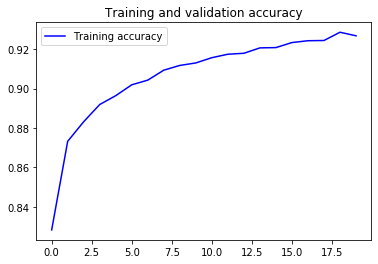

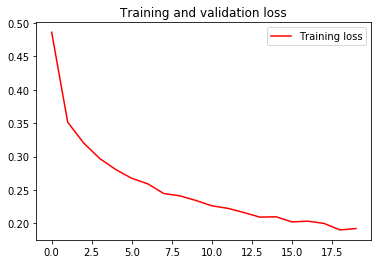

In [45]:
import matplotlib.pyplot as plt

%matplotlib inline
#create graph with x axis as epochs, y axis  as accuracy
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#create graph with x axis as epochs, y axis  as loss
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.title('Training and validation loss')
plt.legend()


In [46]:
#predict result from test data
predicted_classes = model.predict_classes(X_test)

In [47]:
# Testing:
#print out accuracy
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

10000/10000 [==============================] - 5s 510us/step
The accuracy is:  0.9139999747276306
